# Definition(s)

Prim's algorithm is a greedy algorithm that finds a minimum spanning tree for a weighted undirected graph. This means it finds a subset of the edges that forms a tree that includes every vertex, where the total weight of all the edges in the tree is minimized.

The algorithm operates by building this tree one vertex at a time, from an arbitrary starting vertex, at each step adding the cheapest possible connection from the tree to another vertex.

# Algorithm(s)

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

%matplotlib inline

In [2]:
from queue import PriorityQueue

def prim_mst(graph):
    dist = {i: float('inf') for i in graph.nodes()}
    father = {i: -1 for i in graph.nodes()}
    selected = {i: None for i in graph.nodes()}
    dist[0] = 0

    heap = PriorityQueue()
    root = next(x for x in graph.nodes())
    heap.put((dist[root], root))
    
    mst_edges = set()

    while not heap.empty():
        cost, root = heap.get()

        if dist[root] != cost:
            continue
            
        if father[root] != -1:
            mst_edges.add((father[root], root))

        selected[root] = 1

        for v in graph.neighbors(root):
            if selected[v] is None and dist[v] > graph[root][v]['weight']:
                father[v] = root
                dist[v] = graph[root][v]['weight']
                heap.put((dist[v], v))
                
    return mst_edges

In [3]:
def draw_graph(graph, figsize=(10, 10), node_size=800, grid=False):
    mst_edges = prim_mst(graph)
    other_edges = set(graph.edges()).difference(mst_edges)
    
    plt.figure(figsize=figsize)
    plt.axis('off')
    
    labels = nx.get_edge_attributes(graph,'weight')
    
    if grid:
        pos = pos=nx.spring_layout(graph)
    else:
        pos = nx.circular_layout(graph)

    # edges
    nx.draw_networkx_edges(graph,pos, edgelist=mst_edges, width=4, edge_color='r')
    nx.draw_networkx_edges(graph,pos, edgelist=other_edges)
    
    labels = nx.get_edge_attributes(graph,'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels, font_size=10)

    nx.draw_networkx(graph, pos, node_size=node_size, font_color='white', node_color='steelblue')

In [4]:
def assign_random_weights(graph):
    for u, v, d in graph.edges(data=True):
        d['weight'] = np.random.randint(20)
        
    return graph

def assign_unit_weights(graph):
    for u, v, d in graph.edges(data=True):
        d['weight'] = 1
        
    return graph

# Run(s)

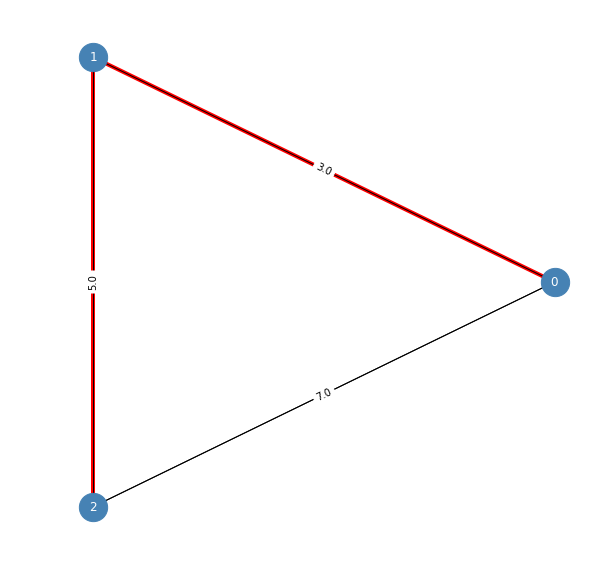

In [5]:
graph = nx.Graph()
graph.add_nodes_from(range(3))
graph.add_edge(0, 1, weight=3.0)
graph.add_edge(1, 2, weight=5.0)
graph.add_edge(2, 0, weight=7.0)

draw_graph(graph)

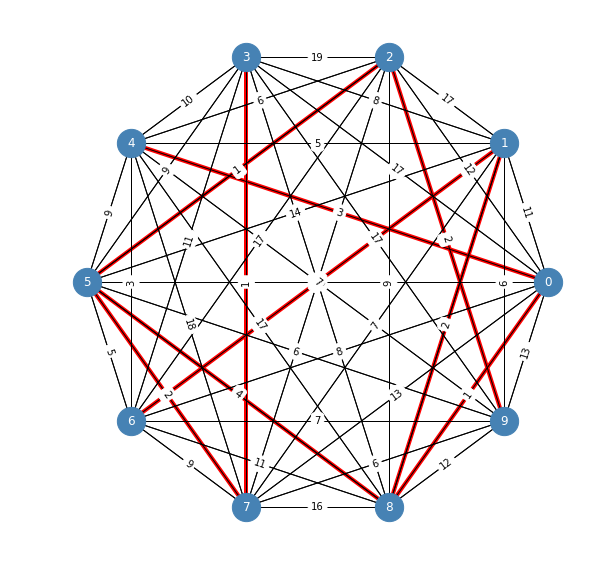

In [6]:
graph = assign_random_weights(nx.complete_graph(10))

draw_graph(graph)

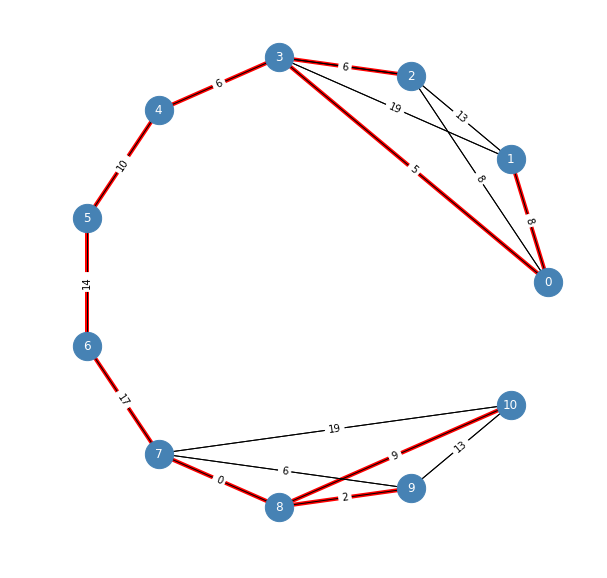

In [7]:
graph = assign_random_weights(nx.barbell_graph(4, 3))

draw_graph(graph)

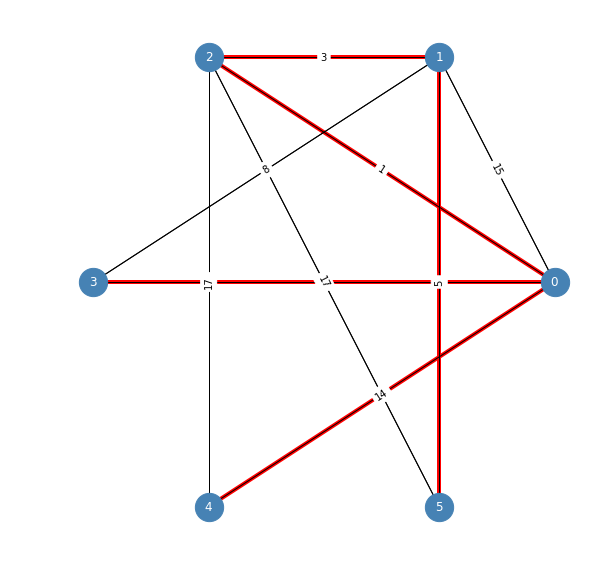

In [8]:
graph = assign_random_weights(nx.dorogovtsev_goltsev_mendes_graph(2))

draw_graph(graph)

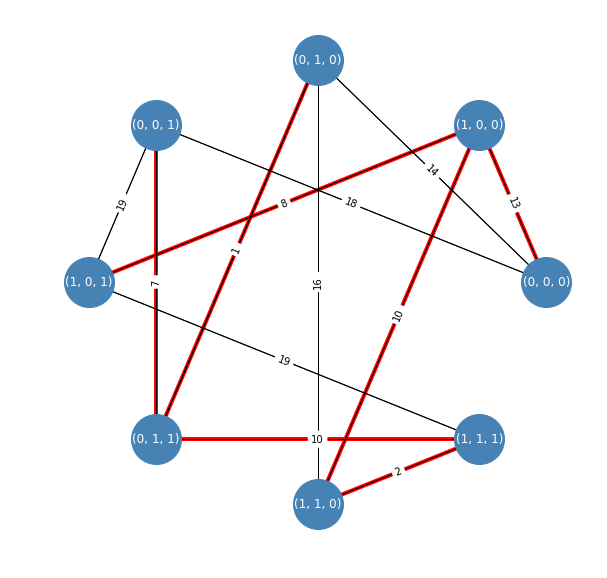

In [9]:
graph = assign_random_weights(nx.hypercube_graph(3))
draw_graph(graph, node_size=2500)

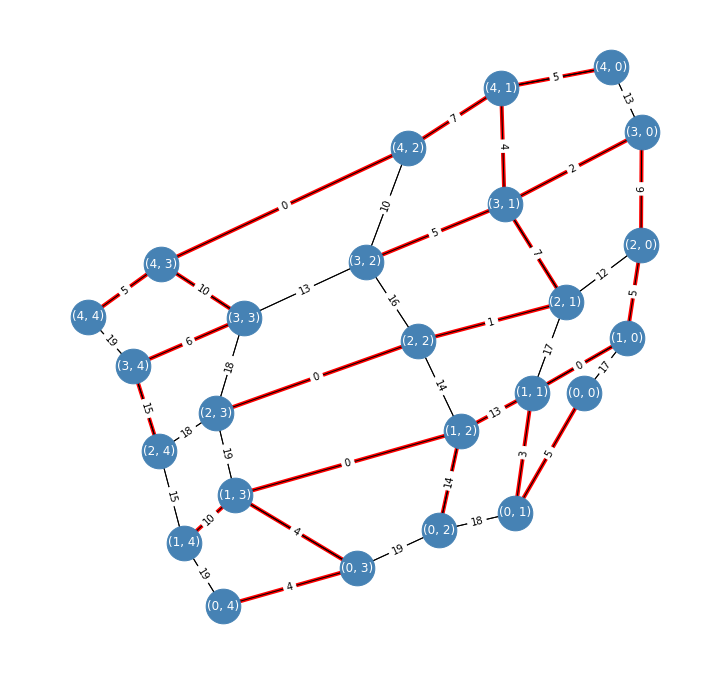

In [10]:
graph = assign_random_weights(nx.grid_2d_graph(5, 5))
draw_graph(graph, figsize=(12, 12), node_size=1200, grid=True)

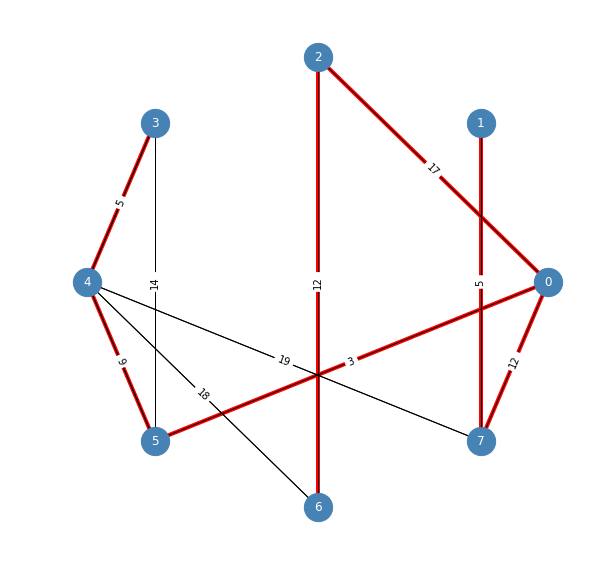

In [11]:
graph = assign_random_weights(nx.sedgewick_maze_graph())
draw_graph(graph)

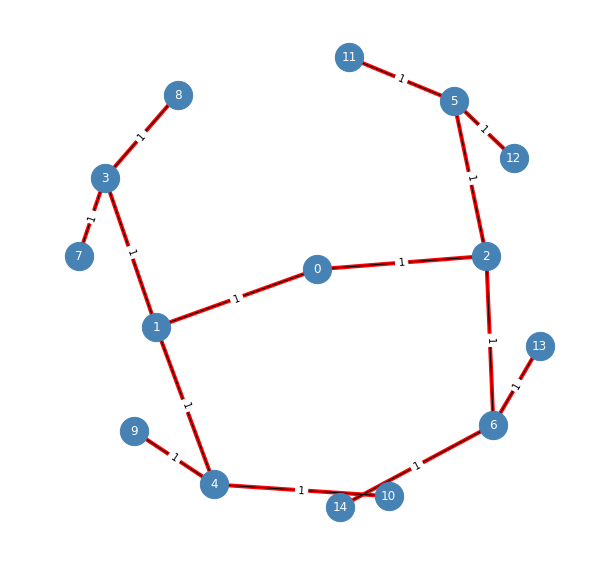

In [12]:
graph = assign_unit_weights(nx.balanced_tree(2, 3))
draw_graph(graph, grid=True)